# Integrating customisation to pre-defined pipelines

This notebook gives an example how to add a custom `qpcr.Analyser` to a pipeline so you can profit from the pipeline's automation. There are two pipelines that support customisation of their core parameters: these are the `Blueprint` and `ddCt` pipelines. In this tutorial we will use the `Blueprint` pipeline, in the next tutorial you will encounter the `ddCt` pipeline.


#### Experimental background

The corresponding experimental setup was as follows: 
Levels of Nonsense-mediated mRNA decay (NMD) sensitive (nmd) and insensitive (prot) transcript isoforms of HNRNPL and SRSF11 were measured by qPCR. As normalisers both 28S rRNA and Actin transcript levels were measured. The replicates are biological triplicates and technical douplicates. All measurements from the same qPCR sample were merged into hexaplicates (6 replicates). This was done in two separate HeLa cell lines (one with a specific gene knockout (KO), and one without (WT)), which were both treated to a plasmid-mediated rescue (+) or not (-), leading to four experimental conditions:


| cell line \\ condition | rescue | no rescue |
| ---------------------- | ------ | --------- |
| knockout               | KO+    | KO-       |
| wildtype               | WT+    | WT-       |



#### First Analysis
In the last tutorial we have specified a custom `anchor` to our `qpcr.Analyser`. However, in the last tutorial we assembled our analysis workflow manually. We do have a nice set of pre-defined pipelines, however, in the `qpcr.Pipes`, so, wouldn't it be nice if we could profit from their automation while still retaining our custom specs? Well, sure it would! That's why we have the `Blueprint` pipeline, which sets up default settings for `DataReader`, `Analyser`, and `Normaliser` but also allows you to overwrite these with your own ones. In truth, the `BasicPlus` pipeline does nothing else but calling the `Blueprint` pipeline with default settings. 

In [1]:
# import the Blueprint pipeline
import qpcr
from qpcr.Pipes import Blueprint
from qpcr.Plotters import PreviewResults

Step 1 - Getting the data
---

First  we get the datafiles (or rather their filepaths). Here, we do this manually. Of course, any more automated process that yields a list of filepaths is also suitable.

In [2]:
# get our datafiles
normaliser_files = [
                        "./Example Data/28S.csv",
                        "./Example Data/actin.csv"
                ]

sample_files = [
                    "./Example Data/HNRNPL_nmd.csv",
                    "./Example Data/HNRNPL_prot.csv",
                    "./Example Data/SRSF11_nmd.csv",
                    "./Example Data/SRSF11_prot.csv",
            ]

# define our experimental parameters
reps = 6
group_names = ["WT-", "WT+", "KO-", "KO+"] 

Step 2 - Setting up the Pipeline
---

### 2.1 Setting up the Pipeline
We have already seen how to set up the `BasicPlus` pipeline in the second tutorial in `2_pipeline_tutorial.ipynb`. Setting up the `Blueprint` pipeline works just the same.

In [3]:
# setup the pipeline
pipeline = Blueprint()

pipeline.replicates(reps)
pipeline.names(group_names)

pipeline.add_assays(sample_files)
pipeline.add_normalisers(normaliser_files)

### 2.2 Setting up the custom `qpcr.Analyser`
Now comes the interesting part. By default the `anchor = "first"`, but let's say we do not want to rely on that, but instead want to use a `"mean"` anchor, just as we did in the last tutorial. We can simply set up a custom `Analyser`, specify the `anchor("mean")` and then link that `Analyser` to our pipeline. 

In [4]:
# setup the analyser and specify anchor
analyser = qpcr.Analyser()
analyser.anchor("mean")

('mean', 0)

Now we can add our Analyser to the pipeline using:

In [5]:
pipeline.Analyser(analyser)

Analyser(anchor='mean', ref=0)

### 2.3 Adding a Preview
Because we like plots so much, we also add a `PreviewResults`...

In [6]:
# setup preview
preview = PreviewResults()
pipeline.add_plotters(preview)

Step 3 - Running everything
---

Now we are already all set up and ready to run.

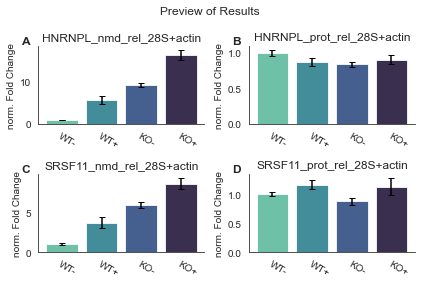

In [7]:
# and now run
pipeline.run()

### 3.1 Finishing up
At this point we are already done with this tutorial. Setting up a custom `Analyser` is no different from setting up a custom `Normaliser` or `Reader`, so you now know how to customise an automated pipeline.